<a href="https://colab.research.google.com/github/BeastHunter0041/csci_4170_s26/blob/main/hw1_CSCI4170.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1:

Task 1:
1. 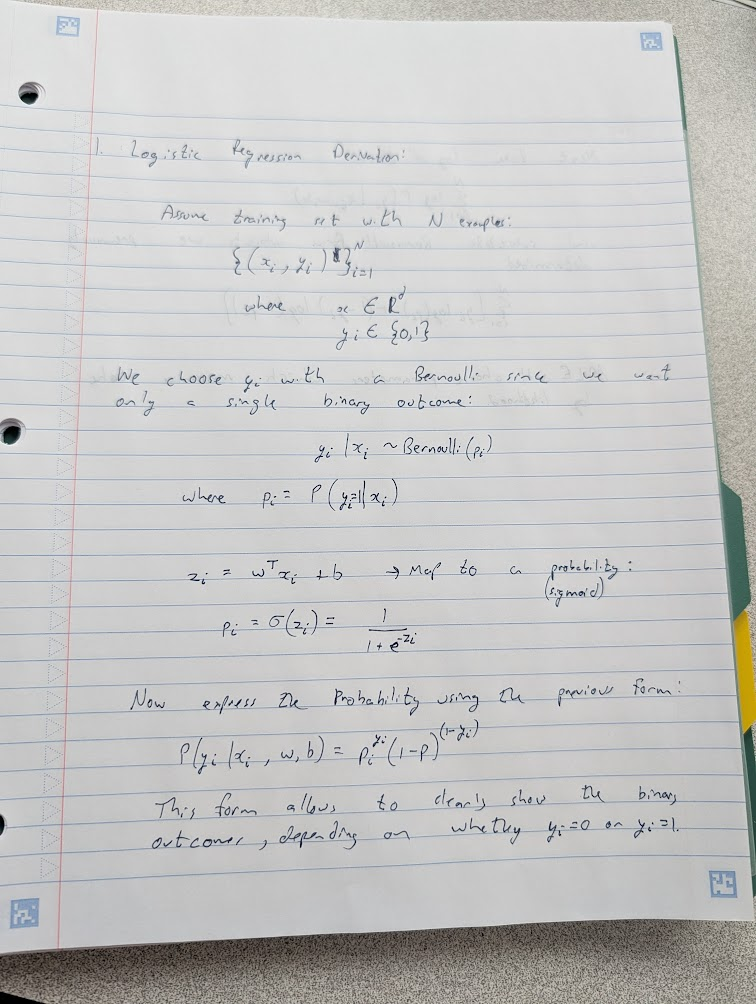
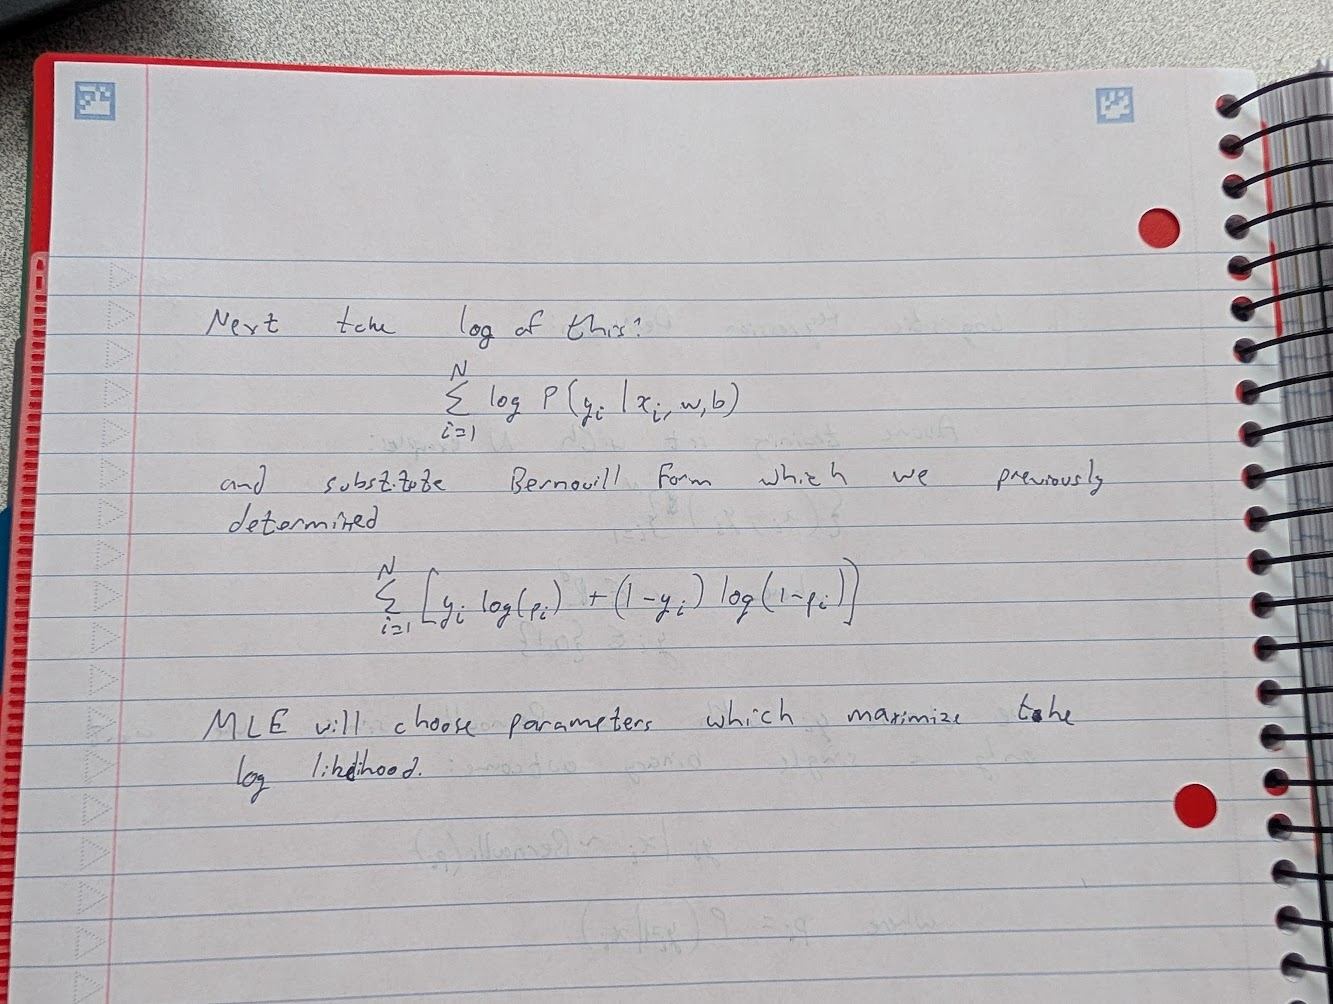
In regards to differences with MAP, MLE will maximize the p(y | X, w, b), whereas MAP will maximize the posterior, expressed as such: (w∗,b∗)=argw,bmax​ p(w,b∣X,y). If we take the log of this we will get argw,bmax​ logp(y∣X,w,b)+logp(w,b).
The "prior" which is added can be thought of as a "weight" which helps with regularization (where a penalty is added to prevent overfitting of the model).
Sources:
https://zstevenwu.com/courses/s20/csci5525/resources/slides/lecture05.pdf
https://stats.stackexchange.com/questions/514232/differences-between-mle-and-map-estimators

2.

1.2
 The dataset I will be using is from UCI, which contains measurements of breast mass biopsies, which we will use to determine whether a tumor is benign or malignant. See link in Task 2.

Logistic Regression is the best choice to model this because of the nature of this type of problem. There are only 2 possible outcomes, benign or malignant, therefore a bernoulli distribution is the best fit for this. Additionally, there is real world presidence for this, as the model will yield a probability estimate. For example if a tumor with P(malignant) = 0.99, a doctor will know that the tumor is almost certainly a problem and must be dealt with, but if P(malignant) = 0.5, it is impossible to determine whether the tumor is actually malignant, and this value gives the doctor information that more testing should likely be conducted.

We will compare this performance against a Linear Support Vector Machine (SVM). Whereas a logistic regression focuses on minimizing the log loss and returns probability, an Linear SVM maximizes the margin between classes. While SVMs are useful in determining accuracy when classifiying, the probability metric is much more beneficial due to it being a concrete measurement of how likely a tumor is to be benign/malignant.
Source: Cortes & Vapnik, “Support-Vector Networks,” Machine Learning, 1995 https://link.springer.com/content/pdf/10.1007/BF00994018.pdf

1.3

X∈R^(N×d) where N = 569, and d = 30 --> This gives us our feature matrix.

We can assign the probabilities yi = 1 if the tumor is malignant, and yi = 0 if the tumor is benign.

Parameters: w∈R^30 b∈R; 30 is the number of different weights which can affect the probability of the tumor being malignant.

We apply all of these values/parameters to our final equation from part 1.

# Task 2:


2.1

 Link to dataset: https://github.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/blob/master/data.csv?raw=true
Original Raw Data: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

2.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
url = "https://github.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/raw/master/data.csv"
breast = pd.read_csv(url)

# Drop non-informative ID column and encode labels
breast = breast.drop(columns=["id"])
breast["diagnosis"] = breast["diagnosis"].map({"M": 1, "B": 0})

breast.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The above block was for loading in the dataset, as well as data cleaning. This involved removing the 'id' column, as this is not predictive information, simply an identifier.

The 'diagnosis' variable is binary, only appearing as a 0 or 1, with the classificiations matching up with what was stated in the previous task.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate predictors and target
X = breast.drop(columns=["diagnosis", "Unnamed: 32"])
y = breast["diagnosis"]

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

X_scaled.describe().T[["mean", "std"]].head()

,mean,std
radius_mean,-1.373633e-16,1.00088
texture_mean,6.868164e-17,1.00088
perimeter_mean,-1.248757e-16,1.00088
area_mean,-2.185325e-16,1.00088
smoothness_mean,-8.366672e-16,1.00088


Multicollinearity Analysis Using VIF

In [ ]:
# Compute VIF for all features
vif_full = pd.DataFrame({
    "feature": X_scaled.columns,
    "VIF": [variance_inflation_factor(X_scaled.values, i)
            for i in range(X_scaled.shape[1])]
}).sort_values("VIF", ascending=False)

vif_full.head(10)


,feature,VIF
0,radius_mean,3806.115296
2,perimeter_mean,3786.400419
20,radius_worst,799.105946
22,perimeter_worst,405.023336
3,area_mean,347.878657
23,area_worst,337.221924
10,radius_se,75.462027
6,concavity_mean,70.767720
12,perimeter_se,70.359695
7,concave points_mean,60.041733


In [ ]:
# Remove highly redundant size-related features
drop_features = ["radius_mean", "perimeter_mean", "area_mean"]
X_reduced = X_scaled.drop(columns=drop_features)

# Recompute VIF
vif_reduced = pd.DataFrame({
    "feature": X_reduced.columns,
    "VIF": [variance_inflation_factor(X_reduced.values, i)
            for i in range(X_reduced.shape[1])]
}).sort_values("VIF", ascending=False)

vif_reduced.head(10)


,feature,VIF
19,perimeter_worst,346.393215
17,radius_worst,330.287103
20,area_worst,80.461426
3,concavity_mean,65.827167
9,perimeter_se,65.160765
4,concave points_mean,56.080925
7,radius_se,55.995423
22,compactness_worst,35.629101
24,concave points_worst,34.982051
2,compactness_mean,32.063417


2.3

Visualizations:


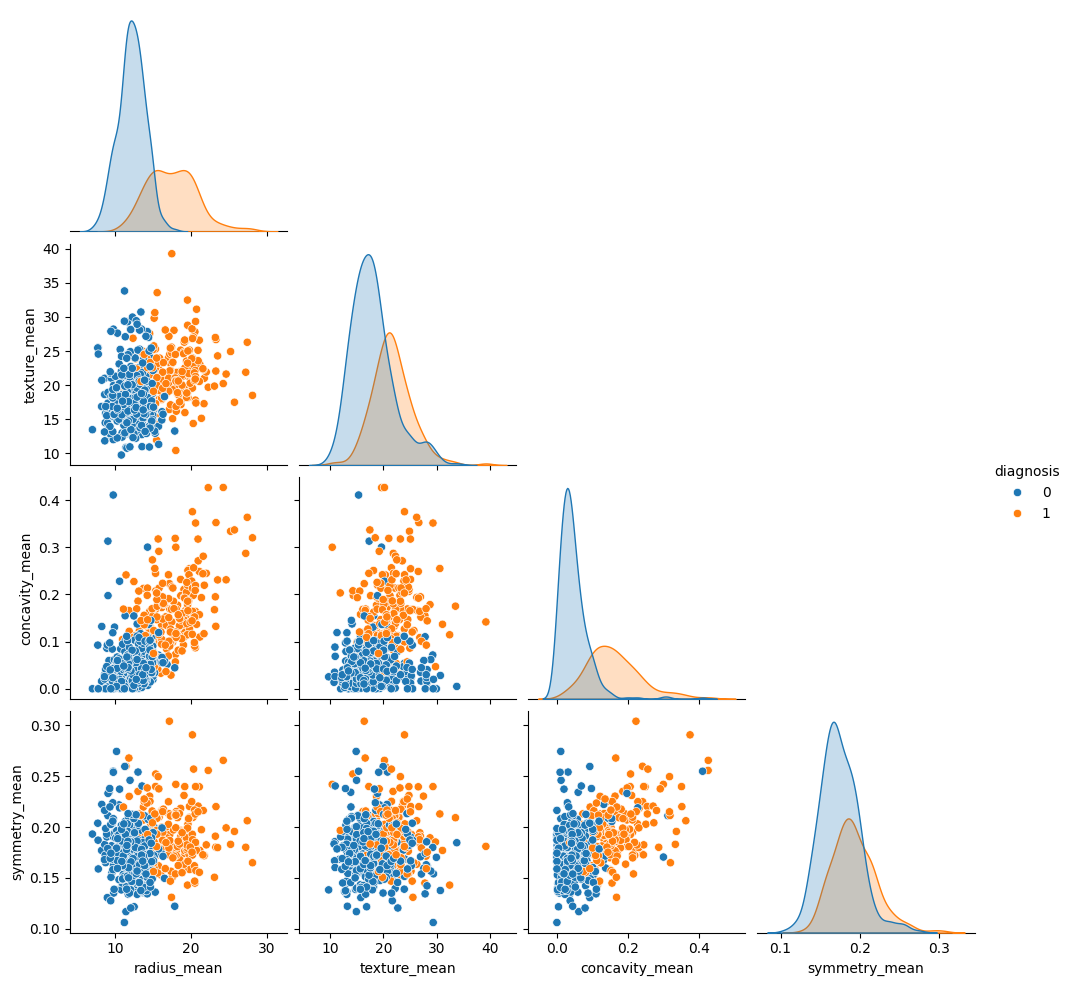

In [ ]:
selected_features = [
    "radius_mean",
    "texture_mean",
    "concavity_mean",
    "symmetry_mean"
]

sns.pairplot(
    breast,
    vars=selected_features,
    hue="diagnosis",
    diag_kind="kde",
    corner=True
)

plt.show()


The pair plot with KDE demonstrates clear class separation between malignant and benign tumors for several key features. The diagonal density plots show that malignant tumors are shifted toward higher values of 'radius_mean' and 'concavity_mean', indicating that these features are individually informative for distinguishing between classes.

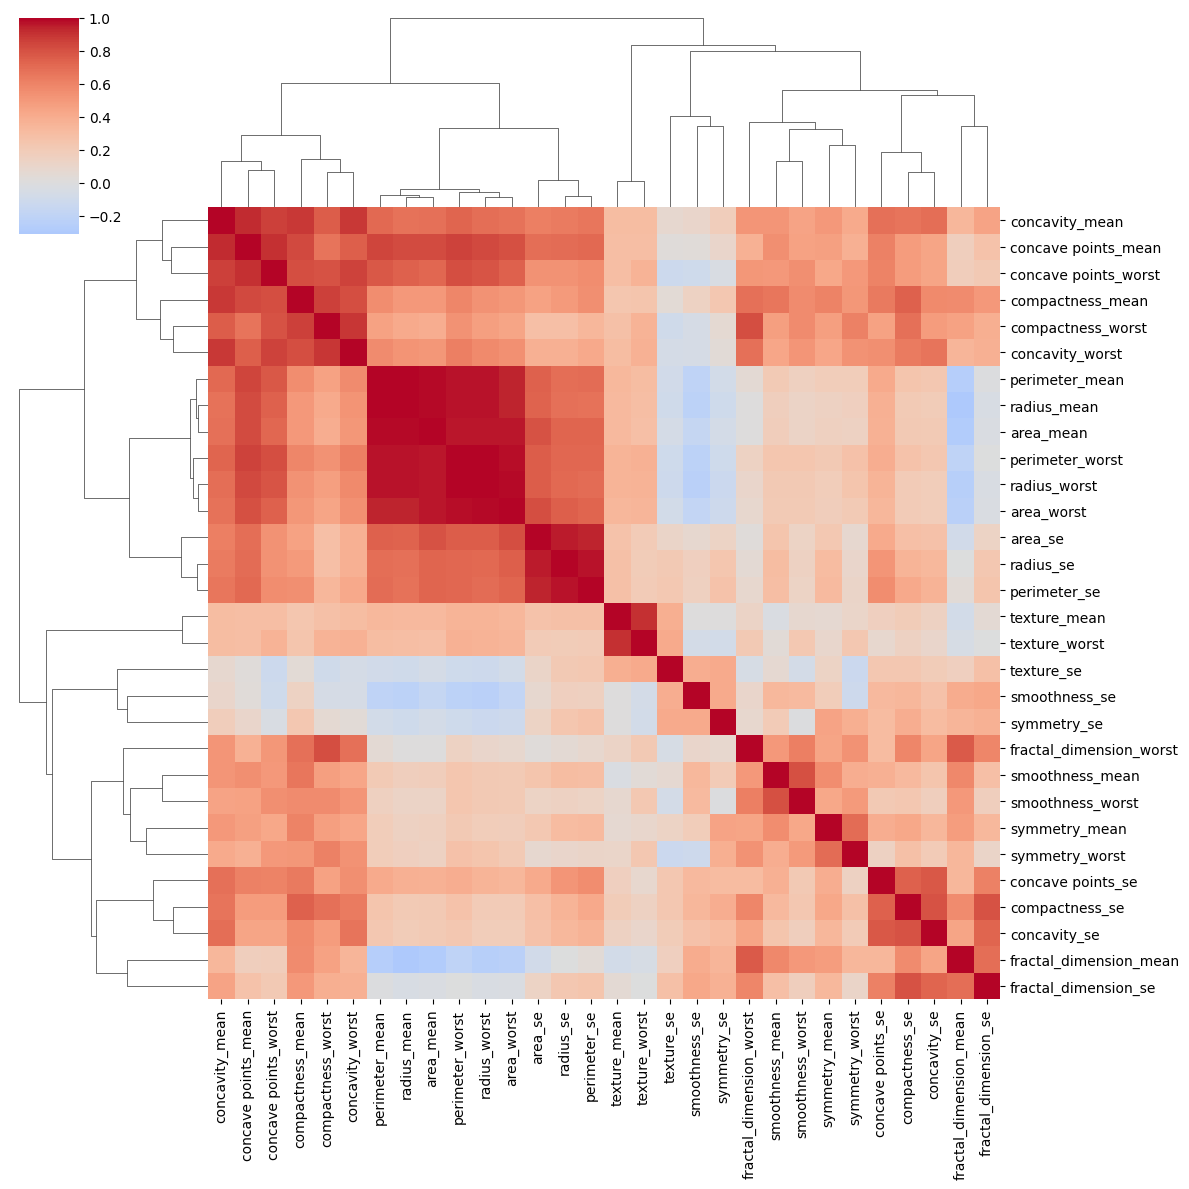

In [ ]:
corr = X.corr()

sns.clustermap(
    corr,
    cmap="coolwarm",
    center=0,
    figsize=(12, 12)
)

plt.show()


The clustered correlation heatmap reveals strong multicollinearity among several groups of features, especially those related to tumor size and boundary irregularity, such as radius, perimeter, area, concavity, and compactness across their mean, worst, and standard error measurements. These features form tightly clustered blocks with high positive correlations, indicating substantial redundancy in the dataset. In contrast, texture and smoothness features exhibit weaker correlations, suggesting they contribute more independent information

# Task 3

3.1

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for faster optimization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Helper
def sigmoid(z):
    # stable-ish sigmoid
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Initialize
n, d = X_train.shape
w = np.zeros(d)
b = 0.0
lr = 0.1
steps = 300

for t in range(steps):
    # Forward (vectorized)
    z = X_train @ w + b            # (n,)
    a = sigmoid(z)                  # (n,)

    # Loss: binary cross-entropy (vectorized)
    eps = 1e-12
    loss = -(y_train*np.log(a+eps) + (1-y_train)*np.log(1-a+eps)).mean()

    # Gradients (vectorized)
    dz = (a - y_train)              # (n,)
    dw = (X_train.T @ dz) / n       # (d,)
    db = dz.mean()

    # Update
    w -= lr * dw
    b -= lr * db

    if t % 50 == 0:
        print(f"step {t:3d} | loss {loss:.4f}")

# Evaluate
test_probs = sigmoid(X_test @ w + b)
test_pred = (test_probs >= 0.5).astype(int)
acc = (test_pred == y_test).mean()
print("Test accuracy (from scratch):", round(float(acc), 4))


step   0 | loss 0.6931
step  50 | loss 0.1249
step 100 | loss 0.0983
step 150 | loss 0.0868
step 200 | loss 0.0801
step 250 | loss 0.0755
Test accuracy (from scratch): 0.9737


In this interpretation of logisitic regression, the dataset is standardized, a sigmoid function is used to produce probability outputs, and the binary cross-entropy loss is minimized via gradient descent by iteratively computing gradients and updating the weights and bias. The loss is monitored during training to show convergence

3.2

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load + split + scale
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def bce_loss(Xb, yb, w, b):
    z = Xb @ w + b
    a = sigmoid(z)
    eps = 1e-12
    return -(yb*np.log(a+eps) + (1-yb)*np.log(1-a+eps)).mean()

def grad_step(Xb, yb, w, b, lr):
    n_b = Xb.shape[0]
    z = Xb @ w + b
    a = sigmoid(z)
    dz = (a - yb)
    dw = (Xb.T @ dz) / n_b
    db = dz.mean()
    w = w - lr * dw
    b = b - lr * db
    return w, b

def train(method="batch", lr=0.1, epochs=50, batch_size=32, seed=42):
    rng = np.random.default_rng(seed)
    n, d = X_train.shape
    w = np.zeros(d)
    b = 0.0
    loss_hist = []

    for ep in range(epochs):
        idx = np.arange(n)
        rng.shuffle(idx)
        Xs = X_train[idx]
        ys = y_train[idx]

        if method == "batch":
            # one update per epoch using all data
            w, b = grad_step(Xs, ys, w, b, lr)

        elif method == "sgd":
            # n updates per epoch using 1 sample each
            for i in range(n):
                Xi = Xs[i:i+1, :]
                yi = ys[i:i+1]
                w, b = grad_step(Xi, yi, w, b, lr)

        elif method == "minibatch":
            # ~n/batch_size updates per epoch
            for start in range(0, n, batch_size):
                Xb = Xs[start:start+batch_size, :]
                yb = ys[start:start+batch_size]
                w, b = grad_step(Xb, yb, w, b, lr)

        else:
            raise ValueError("method must be 'batch', 'sgd', or 'minibatch'")

        # Track full training loss once per epoch (comparable across methods)
        loss_hist.append(bce_loss(X_train, y_train, w, b))

    # Evaluate
    probs = sigmoid(X_test @ w + b)
    pred = (probs >= 0.5).astype(int)
    acc = (pred == y_test).mean()
    return w, b, loss_hist, float(acc)

# Train all three
w_b, b_b, loss_b, acc_b = train(method="batch", lr=0.3, epochs=200)
w_s, b_s, loss_s, acc_s = train(method="sgd", lr=0.05, epochs=20)
w_m, b_m, loss_m, acc_m = train(method="minibatch", lr=0.1, epochs=50, batch_size=32)

print("Batch GD   acc:", round(acc_b, 4), "final loss:", round(loss_b[-1], 4))
print("SGD        acc:", round(acc_s, 4), "final loss:", round(loss_s[-1], 4))
print("Mini-batch acc:", round(acc_m, 4), "final loss:", round(loss_m[-1], 4))



Batch GD   acc: 0.9737 final loss: 0.0621
SGD        acc: 0.9737 final loss: 0.0462
Mini-batch acc: 0.9737 final loss: 0.0595


Batch gradient descent updates parameters using the full training dataset, resulting in smooth and stable convergence but higher computational cost per update. SGD updates parameters using a single sample at a time, leading to faster but noisier convergence due to high gradient variance. Mini-batch gradient descent strikes a balance by using small subsets of data per update, reducing variance while maintaining computational efficiency through vectorization. Based off of the above run results, all methods were equally accurate, but SGD had the least loss, meaning it fit the training objective most effectively.

Sources: Bottou, L., Curtis, F. E., & Nocedal, J. (2018).
Optimization Methods for Large-Scale Machine Learning.
https://arxiv.org/pdf/1609.04747

# Task 4

4.1

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

url = "https://github.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/raw/master/data.csv"
breast = pd.read_csv(url)

# Drop ID and encode label
breast = breast.drop(columns=["id"], errors="ignore")

# Drop any columns that are completely empty (e.g., "Unnamed: 32")
breast = breast.dropna(axis=1, how="all")
breast["diagnosis"] = breast["diagnosis"].map({"M": 1, "B": 0})

X = breast.drop(columns=["diagnosis"]).values
y = breast["diagnosis"].values

# Train/test split (same setup as Task 3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Helper functions
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def predict(X, w, b):
    return (sigmoid(X @ w + b) >= 0.5).astype(int)

def perf_metrics(y_true, y_pred):
    return {
        "accuracy":  float(accuracy_score(y_true, y_pred)),
        "precision": float(precision_score(y_true, y_pred, zero_division=0)),
        "recall":    float(recall_score(y_true, y_pred, zero_division=0)),
        "f1":        float(f1_score(y_true, y_pred, zero_division=0)),
    }


# Logistic regression training with optimizers
def train_logreg_optimizer(
    X, y,
    optimizer="sgd",
    lr=0.01,
    epochs=40,
    batch_size=32,
    beta=0.9,       # momentum
    rho=0.9,        # RMSProp
    beta1=0.9,      # Adam
    beta2=0.999,
    eps=1e-8,
    l2=1e-3,
    seed=42
):
    rng = np.random.default_rng(seed)
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0

    v_w = np.zeros(d)
    r_w = np.zeros(d)
    m_w = np.zeros(d)
    v2_w = np.zeros(d)
    t = 0

    for _ in range(epochs):
        idx = np.arange(n)
        rng.shuffle(idx)
        Xs, ys = X[idx], y[idx]

        for start in range(0, n, batch_size):
            Xb = Xs[start:start+batch_size]
            yb = ys[start:start+batch_size]
            nb = Xb.shape[0]

            z = Xb @ w + b
            a = sigmoid(z)

            dz = a - yb
            dw = (Xb.T @ dz) / nb + l2 * w
            db = dz.mean()

            if optimizer == "sgd":
                w -= lr * dw
                b -= lr * db

            elif optimizer == "momentum":
                v_w = beta * v_w + (1 - beta) * dw
                w -= lr * v_w
                b -= lr * db

            elif optimizer == "rmsprop":
                r_w = rho * r_w + (1 - rho) * (dw ** 2)
                w -= lr * dw / (np.sqrt(r_w) + eps)
                b -= lr * db

            elif optimizer == "adam":
                t += 1
                m_w = beta1 * m_w + (1 - beta1) * dw
                v2_w = beta2 * v2_w + (1 - beta2) * (dw ** 2)

                m_hat = m_w / (1 - beta1 ** t)
                v_hat = v2_w / (1 - beta2 ** t)

                w -= lr * m_hat / (np.sqrt(v_hat) + eps)
                b -= lr * db

    return w, b

# Compare optimizer performance
optimizers_41 = [
    ("SGD (baseline)", {"optimizer": "sgd", "lr": 0.05}),
    ("Momentum",       {"optimizer": "momentum", "lr": 0.05, "beta": 0.9}),
    ("RMSProp",        {"optimizer": "rmsprop", "lr": 0.01, "rho": 0.9}),
    ("Adam",           {"optimizer": "adam", "lr": 0.01}),
]

rows = []
for name, params in optimizers_41:
    w, b = train_logreg_optimizer(
        X_train, y_train,
        epochs=40,
        batch_size=32,
        **params
    )
    y_pred = predict(X_test, w, b)
    mets = perf_metrics(y_test, y_pred)
    mets["optimizer"] = name
    rows.append(mets)

perf_table_41 = (
    pd.DataFrame(rows)
      .set_index("optimizer")
      .sort_values("f1", ascending=False)
)

print("Task 4.1 — Optimizer performance comparison (GitHub dataset):")
perf_table_41


Task 4.1 — Optimizer performance comparison (GitHub dataset):


,accuracy,precision,recall,f1
optimizer,,,,
Adam,0.991228,1.00000,0.976190,0.987952
RMSProp,0.982456,0.97619,0.976190,0.976190
Momentum,0.982456,1.00000,0.952381,0.975610
SGD (baseline),0.982456,1.00000,0.952381,0.975610


All four optimizers were trained using identical preprocessing, model structure, and evaluation procedures to ensure a fair comparison. Adam achieved the strongest performance, with the highest accuracy (0.9912) and F1 score (0.9880), indicating more effective optimization under the default hyperparameters. Momentum, RMSProp, and vanilla SGD produced slightly lower but comparable results, suggesting that adaptive step sizing provided an initial advantage.

4.2

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


url = "https://github.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/raw/master/data.csv"
breast = pd.read_csv(url)

# Drop ID + any completely empty columns (fixes 'Unnamed: 32' issue)
breast = breast.drop(columns=["id"], errors="ignore")
breast = breast.dropna(axis=1, how="all")

# Encode labels
breast["diagnosis"] = breast["diagnosis"].map({"M": 1, "B": 0})

X = breast.drop(columns=["diagnosis"]).astype(float).values
y = breast["diagnosis"].astype(int).values

# Split + scale (same style as Task 3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Metrics
def eval_metrics(y_true, y_pred):
    return {
        "accuracy":  float(accuracy_score(y_true, y_pred)),
        "precision": float(precision_score(y_true, y_pred, zero_division=0)),
        "recall":    float(recall_score(y_true, y_pred, zero_division=0)),
        "f1":        float(f1_score(y_true, y_pred, zero_division=0)),
    }

# Compare all algorithms used in 4.1
EPOCHS = 40
BATCH_SIZE = 32
L2 = 1e-3

optimizers_42 = [
    ("SGD (baseline)", {"optimizer": "sgd", "lr": 0.05}),
    ("Momentum",       {"optimizer": "momentum", "lr": 0.05, "beta": 0.9}),
    ("RMSProp",        {"optimizer": "rmsprop", "lr": 0.01, "rho": 0.9, "eps": 1e-8}),
    ("Adam",           {"optimizer": "adam", "lr": 0.01, "beta1": 0.9, "beta2": 0.999, "eps": 1e-8}),
]

rows = []
for name, params in optimizers_42:
    w, b = train_logreg_optimizer(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        l2=L2,
        **params
    )
    y_pred = predict(X_test, w, b)
    mets = eval_metrics(y_test, y_pred)
    mets["optimizer"] = name
    rows.append(mets)

metrics_table_42 = (
    pd.DataFrame(rows)
      .set_index("optimizer")
      .sort_values("f1", ascending=False)
)

print("Task 4.2 — Precision/Recall/F1 comparison (GitHub dataset, Test set):")
metrics_table_42


Task 4.2 — Precision/Recall/F1 comparison (GitHub dataset, Test set):


,accuracy,precision,recall,f1
optimizer,,,,
Adam,0.991228,1.00000,0.976190,0.987952
RMSProp,0.982456,0.97619,0.976190,0.976190
Momentum,0.982456,1.00000,0.952381,0.975610
SGD (baseline),0.982456,1.00000,0.952381,0.975610


The results of this were the same as before, since metrics were already being used to compare the performance of the algorithms.

4.3

In [ ]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

url = "https://github.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/raw/master/data.csv"
breast = pd.read_csv(url)

breast = breast.drop(columns=["id"], errors="ignore")
breast = breast.dropna(axis=1, how="all")
breast["diagnosis"] = breast["diagnosis"].map({"M": 1, "B": 0})

X = breast.drop(columns=["diagnosis"]).astype(float).values
y = breast["diagnosis"].astype(int).values

# Split into train/test, then train/val (for tuning)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)  # ~60/20/20 split

# Scale using train split, then apply to val/test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

# For final training, fit scaler on full training set and transform test
scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_scaled = scaler_full.transform(X_test)

# Metrics
def eval_metrics(y_true, y_pred):
    return {
        "accuracy":  float(accuracy_score(y_true, y_pred)),
        "precision": float(precision_score(y_true, y_pred, zero_division=0)),
        "recall":    float(recall_score(y_true, y_pred, zero_division=0)),
        "f1":        float(f1_score(y_true, y_pred, zero_division=0)),
    }

# Grid search per optimizer (select by validation F1)
def tune_optimizer(optimizer_name, grid, epochs=40, batch_size=32, l2=1e-3):
    best = None
    best_f1 = -1.0

    for params in ParameterGrid(grid):
        start = time.time()
        w, b = train_logreg_optimizer(
            X_train, y_train,
            optimizer=optimizer_name,
            epochs=epochs,
            batch_size=batch_size,
            l2=l2,
            **params
        )
        elapsed = time.time() - start

        y_val_pred = predict(X_val, w, b)
        f1_val = f1_score(y_val, y_val_pred, zero_division=0)

        if f1_val > best_f1:
            best_f1 = f1_val
            best = {"optimizer": optimizer_name, "best_val_f1": float(f1_val), "params": params, "tune_time_sec": float(elapsed)}

    return best

# Grids
grid_sgd = {"lr": [0.01, 0.05, 0.1]}
grid_momentum = {"lr": [0.01, 0.05, 0.1], "beta": [0.8, 0.9, 0.95]}
grid_rmsprop = {"lr": [0.001, 0.005, 0.01], "rho": [0.9, 0.95, 0.99], "eps": [1e-8]}
grid_adam = {"lr": [0.001, 0.003, 0.01], "beta1": [0.9, 0.95], "beta2": [0.999], "eps": [1e-8]}

best_sgd      = tune_optimizer("sgd",      grid_sgd)
best_momentum = tune_optimizer("momentum", grid_momentum)
best_rmsprop  = tune_optimizer("rmsprop",  grid_rmsprop)
best_adam     = tune_optimizer("adam",     grid_adam)

best_list = [best_sgd, best_momentum, best_rmsprop, best_adam]
best_df = pd.DataFrame(best_list).sort_values("best_val_f1", ascending=False)

print("Task 4.3 — Best hyperparameters by validation F1:")
best_df

# Retrain with best params on FULL training set, evaluate on TEST
final_rows = []
for row in best_list:
    opt = row["optimizer"]
    params = row["params"]

    start = time.time()
    w, b = train_logreg_optimizer(
        X_train_full_scaled, y_train_full,
        optimizer=opt,
        epochs=60,
        batch_size=32,
        l2=1e-3,
        **params
    )
    retrain_time = time.time() - start

    y_test_pred = predict(X_test_scaled, w, b)
    mets = eval_metrics(y_test, y_test_pred)

    final_rows.append({
        "optimizer": opt,
        "val_f1(best)": row["best_val_f1"],
        "test_precision": mets["precision"],
        "test_recall": mets["recall"],
        "test_f1": mets["f1"],
        "test_accuracy": mets["accuracy"],
        "best_params": params,
        "retrain_time_sec": float(retrain_time)
    })

final_results_43 = pd.DataFrame(final_rows).sort_values("test_f1", ascending=False)

print("\nTask 4.3 — Final test performance using tuned hyperparameters:")
final_results_43


Task 4.3 — Best hyperparameters by validation F1:

Task 4.3 — Final test performance using tuned hyperparameters:


,optimizer,val_f1(best),test_precision,test_recall,test_f1,test_accuracy,best_params,retrain_time_sec
2,rmsprop,0.965517,1.00000,0.976190,0.987952,0.991228,"{'eps': 1e-08, 'lr': 0.001, 'rho': 0.99}",0.348871
3,adam,0.965517,0.97619,0.976190,0.976190,0.982456,"{'beta1': 0.9, 'beta2': 0.999, 'eps': 1e-08, '...",0.272910
1,momentum,0.965517,1.00000,0.952381,0.975610,0.982456,"{'beta': 0.8, 'lr': 0.1}",0.055787
0,sgd,0.964706,1.00000,0.952381,0.975610,0.982456,{'lr': 0.05},0.064791


Hyperparameter tuning through grid search reduced performance gaps across optimizers, demonstrating that parameter selection strongly influences model outcomes. After tuning, RMSProp achieved the highest test F1 score (0.9880) and accuracy (0.9912), outperforming Adam, while Momentum and SGD converged to nearly identical performance.

Sources:Kingma, D. P., & Ba, J. (2015).
Adam: A Method for Stochastic Optimization.
https://arxiv.org/pdf/1412.6980

4.4

Across all experiments, adaptive optimization methods such as Adam and RMSProp demonstrated faster and more reliable convergence, particularly when hyperparameters were well tuned, resulting in slightly improved performance compared to vanilla SGD. However the use of these methods come with a higher cost and memory usage due to the additional optimizer state.